# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





## Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from IPython.display import display

In [2]:
# Making sure all columns of our dataframe are seen
pd.set_option('display.max_columns', 30)
# Setting context for seaborn
sns.set_context(context='talk', font_scale=1)

## Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
2             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
3             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
4             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   

     Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0  never       never       NaN                  4~8              1~3   
1  never       never       NaN                  4~8              1~3   
2  never       never       NaN                  4~8              1~3   
3  never       never       NaN                  4~8              1~3   
4  never       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Y  
0              1  1  
1              1  0  
2              1  1  
3              1  0  
4              1  0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Data Preparation 

2. Investigate the dataset for missing or problematic data.

In [6]:
# Look for columns with number of null values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
# Get unique values with dtype columns as object
rows = data.shape[0]

null_data = data.isnull().sum() / rows
print('% of missing data for columns')
print((null_data[null_data > 0] * 100).round(2))


% of missing data for columns
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
dtype: float64


In [8]:
# Get unique values for each column with dtype as object
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in 'expiration': ['1d' '2h']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in 'occupation': ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Rel

3. Decide what to do about your missing data -- drop, replace, other...

## Missing data columns




In [9]:
# As car has 99.15% of missing data, with unique value
# [nan, 'Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive', 'Car that is too old to install Onstar :D'].
# and with no description of car column, assuming what car user is using.
# In this case its better to drop the column as it has no use.
data = data.drop(columns=['car'])

In [10]:
# The rest of the missing data for the columns are small percentage. So, dropping those rows
data = data.dropna()

In [11]:
# Making sure that there are no columns with null values
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [12]:
# After dropping we are down from 12684 rows to 12079 rows
data.shape

(12079, 25)

In [13]:
## As all the object columns are categorical which was evident from their
## unique values, covenrting them to categorical.

# unordered categorical columns
unordered_cat_columns = ['destination', 'passanger', 'weather', 'time',
                         'coupon', 'gender', 'maritalStatus', 'occupation'
                        ]

for column in unordered_cat_columns:
    data[column] = pd.Categorical(data[column])

# ordered categorical columns: expiration, age, education, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
expiration_order = ['2h', '1d']
data['expiration'] = pd.Categorical(data['expiration'], categories=expiration_order, ordered=True)

age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
data['age'] = pd.Categorical(data['age'], categories=age_order, ordered=True)

education_order = ['Some High School',
                   'High School Graduate',
                   'Some college - no degree',
                   'Associates degree',
                   'Bachelors degree',
                   'Graduate degree (Masters or Doctorate)'
                  ]
data['education'] = pd.Categorical(data['education'], categories=education_order, ordered=True)

income_order = ['Less than $12500',
                '$12500 - $24999',
                '$25000 - $37499',
                '$37500 - $49999',
                '$50000 - $62499',
                '$62500 - $74999',
                '$75000 - $87499',
                '$87500 - $99999',
                '$100000 or More'
               ]
data['income'] = pd.Categorical(data['income'], categories=income_order, ordered=True)

Bar_order = ['never', 'less1', '1~3', '4~8', 'gt8']
data['Bar'] = pd.Categorical(data['Bar'], categories=Bar_order, ordered=True)

CoffeeHouse_order = ['never', 'less1', '1~3', '4~8', 'gt8']
data['CoffeeHouse'] = pd.Categorical(data['CoffeeHouse'], categories=CoffeeHouse_order, ordered=True)

CarryAway_order = ['never', 'less1', '1~3', '4~8', 'gt8']
data['CarryAway'] = pd.Categorical(data['CarryAway'], categories=CarryAway_order, ordered=True)

RestaurantLessThan20_order = ['never', 'less1', '1~3', '4~8', 'gt8']
data['RestaurantLessThan20'] = pd.Categorical(
    data['RestaurantLessThan20'], categories=RestaurantLessThan20_order, ordered=True
)

Restaurant20To50_order = ['never', 'less1', '1~3', '4~8', 'gt8']
data['Restaurant20To50'] = pd.Categorical(
    data['Restaurant20To50'], categories=Restaurant20To50_order, ordered=True
)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12079 non-null  category
 1   passanger             12079 non-null  category
 2   weather               12079 non-null  category
 3   temperature           12079 non-null  int64   
 4   time                  12079 non-null  category
 5   coupon                12079 non-null  category
 6   expiration            12079 non-null  category
 7   gender                12079 non-null  category
 8   age                   12079 non-null  category
 9   maritalStatus         12079 non-null  category
 10  has_children          12079 non-null  int64   
 11  education             12079 non-null  category
 12  occupation            12079 non-null  category
 13  income                12079 non-null  category
 14  Bar                   12079 non-null  category
 15  Coffee

4. What proportion of the total observations chose to accept the coupon? 



In [14]:
coupon_accepted_percent = ( data.query('Y == 1').shape[0] / data.shape[0] ) * 100
print(f'Coupon accepted: {coupon_accepted_percent:0.2f}%')

Coupon accepted: 56.93%


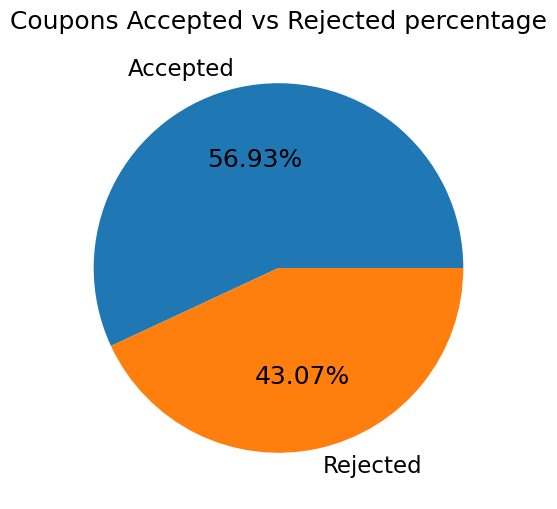

In [15]:
# Creating pie plot for Coupons Accepted vs Rejected percentage
coupon_response = data['Y'].value_counts().reset_index()
labels_mapping = {1: 'Accepted', 0: 'Rejected'}
labels = [labels_mapping[i] for i in coupon_response['Y']]

plt.figure(figsize=(10, 6))
plt.pie(coupon_response['count'], labels=labels, autopct='%.2f%%')
plt.title('Coupons Accepted vs Rejected percentage')
plt.savefig('images/Coupons Accepted vs Rejected percentage.png', format='png')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

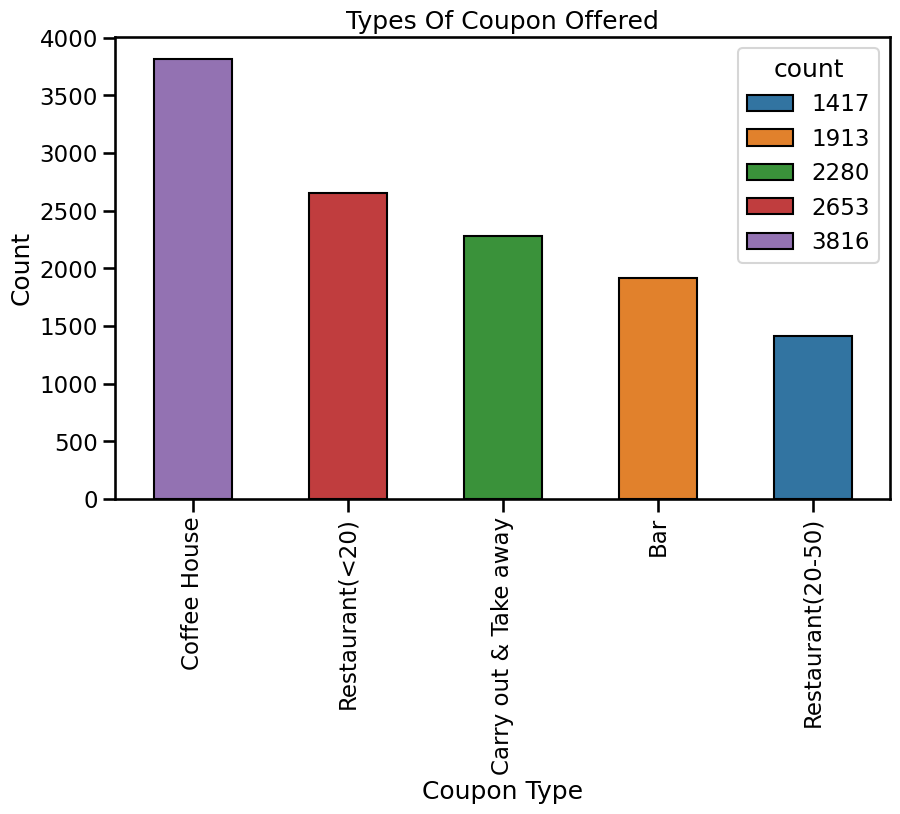

In [16]:
coupons_count = data['coupon'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=coupons_count,
                 x='coupon',
                 y='count',
                 hue='count',
                 dodge=False,
                 width=0.5,
                 edgecolor='black',
                 order=coupons_count['coupon']
                )
ax.set_title('Types Of Coupon Offered')
ax.set_xlabel('Coupon Type')
ax.set_ylabel('Count')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.savefig('images/Types Of Coupon Offered.png', format='png', bbox_inches='tight')
plt.show()

6. Use a histogram to visualize the temperature column.

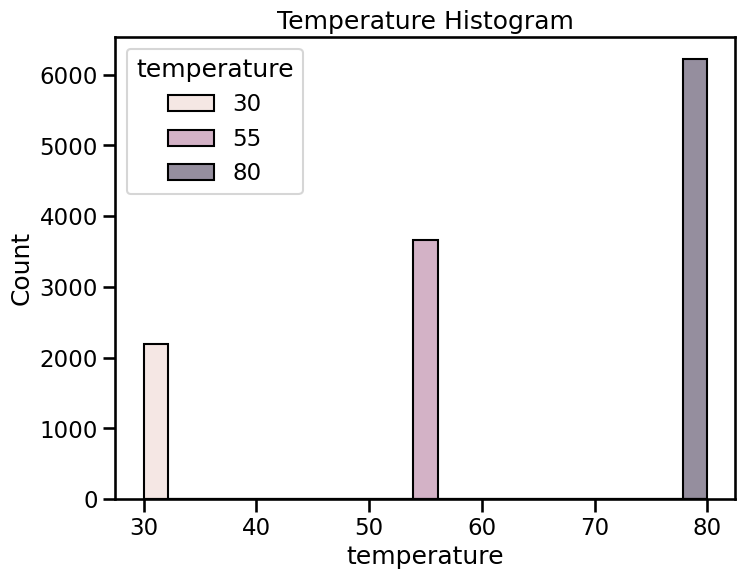

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=data, x='temperature', hue='temperature')
ax.set_title('Temperature Histogram')
plt.savefig('images/Temperature Histogram.png', format='png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
data_bar = data.query('coupon == "Bar"').reset_index(drop=True)
data_bar.head()

destination  passanger weather  temperature  time coupon expiration  \
0  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
1             Home      Alone   Sunny           55   6PM    Bar         1d   
2             Work      Alone   Sunny           55   7AM    Bar         1d   
3  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
4             Home      Alone   Sunny           55   6PM    Bar         1d   

  gender age maritalStatus  has_children                 education  \
0   Male  21        Single             0          Bachelors degree   
1   Male  21        Single             0          Bachelors degree   
2   Male  21        Single             0          Bachelors degree   
3   Male  46        Single             0  Some college - no degree   
4   Male  46        Single             0  Some college - no degree   

                   occupation           income    Bar CoffeeHouse CarryAway  \
0  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
1  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
2  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
3                     Student  $12500 - $24999  never         4~8       1~3   
4                     Student  $12500 - $24999  never         4~8       1~3   

  RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  \
0                  4~8            less1                 1                  0   
1                  4~8            less1                 1                  0   
2                  4~8            less1                 1                  1   
3                  1~3            never                 1                  0   
4                  1~3            never                 1                  0   

   toCoupon_GEQ25min  direction_same  direction_opp  Y  
0                  0               0              1  1  
1                  0               1              0  1  
2                  1               0              1  1  
3                  0               0              1  0  
4                  0               1              0  0

2. What proportion of bar coupons were accepted?


In [19]:
bar_coupons_accepted_percent = ( data_bar.query('Y == 1').shape[0] / data_bar.shape[0] ) * 100
print(f'Proportion of bar coupons that were accpeted: {bar_coupons_accepted_percent:0.2f}%')

Proportion of bar coupons that were accpeted: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
# Values for columns we are interested in
bar_upto_3 = ["never", "less1", "1~3"]
bar_above_3 = ["4~8", "gt8"]

# Filtering data for bar
data_bar_upto_3 = data_bar.query('Bar in @bar_upto_3').reset_index(drop=True)
data_bar_above_3 = data_bar.query('Bar in @bar_above_3').reset_index(drop=True)

print(f'data_bar_upto_3 dataset size: {data_bar_upto_3.shape[0]}')
print(f'data_bar_above_3 dataset size: {data_bar_above_3.shape[0]}')

# Calculating percentages 
bar_upto_3_pct = (data_bar_upto_3.query('Y == 1').shape[0] / data_bar_upto_3.shape[0]) * 100
bar_above_3_pct = (data_bar_above_3.query('Y == 1').shape[0] / data_bar_above_3.shape[0]) * 100

print(f'Coupon acceptance rate by who went to a bar 3 or fewer times a month: {bar_upto_3_pct:.2f}%')
print(f'Coupon acceptance rate by who went to a bar more than 3 times a month: {bar_above_3_pct:.2f}%')

data_bar_upto_3 dataset size: 1720
data_bar_above_3 dataset size: 193
Coupon acceptance rate by who went to a bar 3 or fewer times a month: 37.27%
Coupon acceptance rate by who went to a bar more than 3 times a month: 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
# Values for columns we are interested in
bar_above_1 = ["1~3", "4~8", "gt8"]
age_above_25 = ["26", "31", "36", "41", "46", "50plus"]

# Filtering data for bar
data_bar_above_1 = data_bar.query('(Bar in @bar_above_1) and (age in @age_above_25)').reset_index(drop=True)
data_bar_others = data_bar.query('(Bar not in @bar_above_1) and (age not in @age_above_25)').reset_index(drop=True)

print(f'data_bar_above_1 dataset size: {data_bar_above_1.shape[0]}')
print(f'data_bar_others dataset size: {data_bar_others.shape[0]}')

# Calculating percentages 
bar_above_1_pct = (data_bar_above_1.query('Y == 1').shape[0] / data_bar_above_1.shape[0]) * 100
bar_others_pct = (data_bar_others.query('Y == 1').shape[0] / data_bar_others.shape[0]) * 100

print(f'Coupon acceptance rate by who went to a bar more than once a month and over 25 years old:' \
      f' {bar_above_1_pct:.2f}%')
print(f'Coupon acceptance rate by others from above: {bar_others_pct:.2f}%')


data_bar_above_1 dataset size: 403
data_bar_others dataset size: 309
Coupon acceptance rate by who went to a bar more than once a month and over 25 years old: 68.98%
Coupon acceptance rate by others from above: 38.83%


Yes, a notable distinction exists between the two groups analyzed. It appears significantly more likely that individuals who frequent a bar more than once a month and are above 25 years of age will accept a bar coupon compared to those who visit bars less frequently (less than once a month) and are under 25 years old.

This observation suggests a higher coupon acceptance among the former group.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
# Values for columns we are interested in
bar_above_1 = ["1~3", "4~8", "gt8"]

# Filtering data for bar

# group 1 contains people who go to bars more than once a month and had passengers that were not a
# kid and had occupations other than farming, fishing, or forestry

# group 2 contains data other than group 1.
data_group_1 = data_bar.query(
    '(Bar in @bar_above_1) and (passanger != "Kid(s)") and (occupation != "Farming Fishing & Forestry")'
).reset_index(drop=True)
data_group_2 = data_bar.query(
    '(Bar not in @bar_above_1) and (passanger == "Kid(s)") and (occupation == "Farming Fishing & Forestry")'
).reset_index(drop=True)

print(f'data_group_1 dataset size: {data_group_1.shape[0]}')
print(f'data_group_2 dataset size: {data_group_2.shape[0]}')

# Calculating percentages
group1_pct = (data_group_1.query('Y == 1').shape[0] / data_group_1.shape[0]) * 100
group2_pct = (data_group_2.query('Y == 1').shape[0] / data_group_2.shape[0]) * 100

print(f'Coupon acceptance rate between drivers who go to bars more than once a month and had passengers that ' \
      f'were not a kid and had occupations other than farming, fishing, or forestry: {group1_pct:.2f}%')
print(f'Coupon acceptance rate by others from above: {group2_pct:.2f}%')


data_group_1 dataset size: 530
data_group_2 dataset size: 3
Coupon acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 70.94%
Coupon acceptance rate by others from above: 33.33%


Yes, a notable distinction exists between the two groups analyzed. It appears significantly more likely that individuals who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry will accept a bar coupon compared to those who doesn't belong to this group but the caveat is that group 3 data size is only 3.

We may need more data for group 2 if we want to do a comparision. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [23]:
# Values for columns we are interested in
bar_above_1 = ["1~3", "4~8", "gt8"]
under30 = ["below21", "21", "26"]
restaurant_above4 = ["4~8", "gt8"]
income_below_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Filtering data for bar
bar_above_1_no_kid_not_widowed = data_bar.query(
    '(Bar in @bar_above_1) and (passanger != "Kid(s)") and (maritalStatus != "Widowed")'
).reset_index(drop=True)

bar_above_1_under30 = data_bar.query(
    '(Bar in @bar_above_1) and (age in @under30)'
).reset_index(drop=True)

cheap_restaurants_above4_income_below_50k = data_bar.query(
    '(RestaurantLessThan20 in @restaurant_above4) and (income in @income_below_50k)'
).reset_index(drop=True)

print(f'bar_above_1_no_kid_not_widowed dataset size: {bar_above_1_no_kid_not_widowed.shape[0]}')
print(f'bar_above_1_under30 dataset size: {bar_above_1_under30.shape[0]}')
print(f'cheap_restaurants_above4_income_below_50k dataset size: {cheap_restaurants_above4_income_below_50k.shape[0]}')

# Calculating percentages
bar_above_1_no_kid_not_widowed_pct = (
    bar_above_1_no_kid_not_widowed.query('Y == 1').shape[0] / bar_above_1_no_kid_not_widowed.shape[0]
) * 100
bar_above_1_under30_pct = (
    bar_above_1_under30.query('Y == 1').shape[0] / bar_above_1_under30.shape[0]
) * 100
cheap_restaurants_above4_income_below_50k = (
    cheap_restaurants_above4_income_below_50k.query('Y == 1').shape[0] / cheap_restaurants_above4_income_below_50k.shape[0]
) * 100

print(f'Coupon acceptance rate by people who go to bars more than once a month, had passengers' \
      f'that were not a kid, and were not widowed: {bar_above_1_no_kid_not_widowed_pct:.2f}%')

print(f'Coupon acceptance rate by people who go to bars more than once a month and are under the age of 30:' \
      f' {bar_above_1_under30_pct:.2f}%')

print(f'Coupon acceptance rate by people who go to cheap restaurants more than 4 times a month and income' \
      f' is less than 50K: {cheap_restaurants_above4_income_below_50k:.2f}%')

bar_above_1_no_kid_not_widowed dataset size: 530
bar_above_1_under30 dataset size: 328
cheap_restaurants_above4_income_below_50k dataset size: 333
Coupon acceptance rate by people who go to bars more than once a month, had passengersthat were not a kid, and were not widowed: 70.94%
Coupon acceptance rate by people who go to bars more than once a month and are under the age of 30: 71.95%
Coupon acceptance rate by people who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Bar Visit Frequency**: There's a clear trend that drivers who visit bars more regularly, especially those going more than three times a month, show a significantly higher likelihood of accepting bar coupons.

**Age Influence**: The age of drivers plays a crucial role. Those aged over 25, particularly if they are regular bar-goers, are more inclined to accept coupons, hinting at a preference for social outings among this more mature age group.

**Family Dynamics**: The family status of drivers, especially those without kid passengers and who are not widowed, correlates with a higher acceptance of bar coupons. This trend might reflect how certain lifestyle choices impact openness to leisure offers.

**Financial and Dining Choices**: A noticeable pattern is that individuals often dining at budget-friendly restaurants and earning below $50K are less inclined to accept bar coupons, with a 45.65% acceptance rate. This could point to distinct priorities or financial considerations shaping their engagement with such promotions.

Overall, these insights reveal that drivers who are socially active, of a certain age, and with specific family backgrounds are more receptive to bar coupons. This understanding could be instrumental in devising more effective marketing strategies or in comprehending consumer behavior related to leisure and promotional activities.

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

## Coffee House Coupon

Investigate what kind of users have high chance of accepting coffee house coupon.

In [24]:
# Creating dataframe for column 'coupon' for 'Coffee House'
coffee_house_df = data.query('coupon == "Coffee House"').reset_index(drop=True)
coffee_house_df.head()

destination  passanger weather  temperature  time        coupon  \
0  No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
1  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
3  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80   6PM  Coffee House   

  expiration gender age maritalStatus  has_children         education  \
0         2h   Male  21        Single             0  Bachelors degree   
1         1d   Male  21        Single             0  Bachelors degree   
2         2h   Male  21        Single             0  Bachelors degree   
3         1d   Male  21        Single             0  Bachelors degree   
4         2h   Male  21        Single             0  Bachelors degree   

                   occupation           income    Bar CoffeeHouse CarryAway  \
0  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
1  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
2  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
3  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
4  Architecture & Engineering  $62500 - $74999  never       less1       4~8   

  RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  \
0                  4~8            less1                 1                  0   
1                  4~8            less1                 1                  0   
2                  4~8            less1                 1                  1   
3                  4~8            less1                 1                  1   
4                  4~8            less1                 1                  0   

   toCoupon_GEQ25min  direction_same  direction_opp  Y  
0                  0               0              1  0  
1                  0               0              1  0  
2                  0               0              1  0  
3                  0               0              1  0  
4                  0               0              1  0

### Creating bra/count plot for category

Creating bar plot for all the available category data types aganist whether the coupon is accepted or not (column 'Y') to see which variables contribute to accepting a coupon.

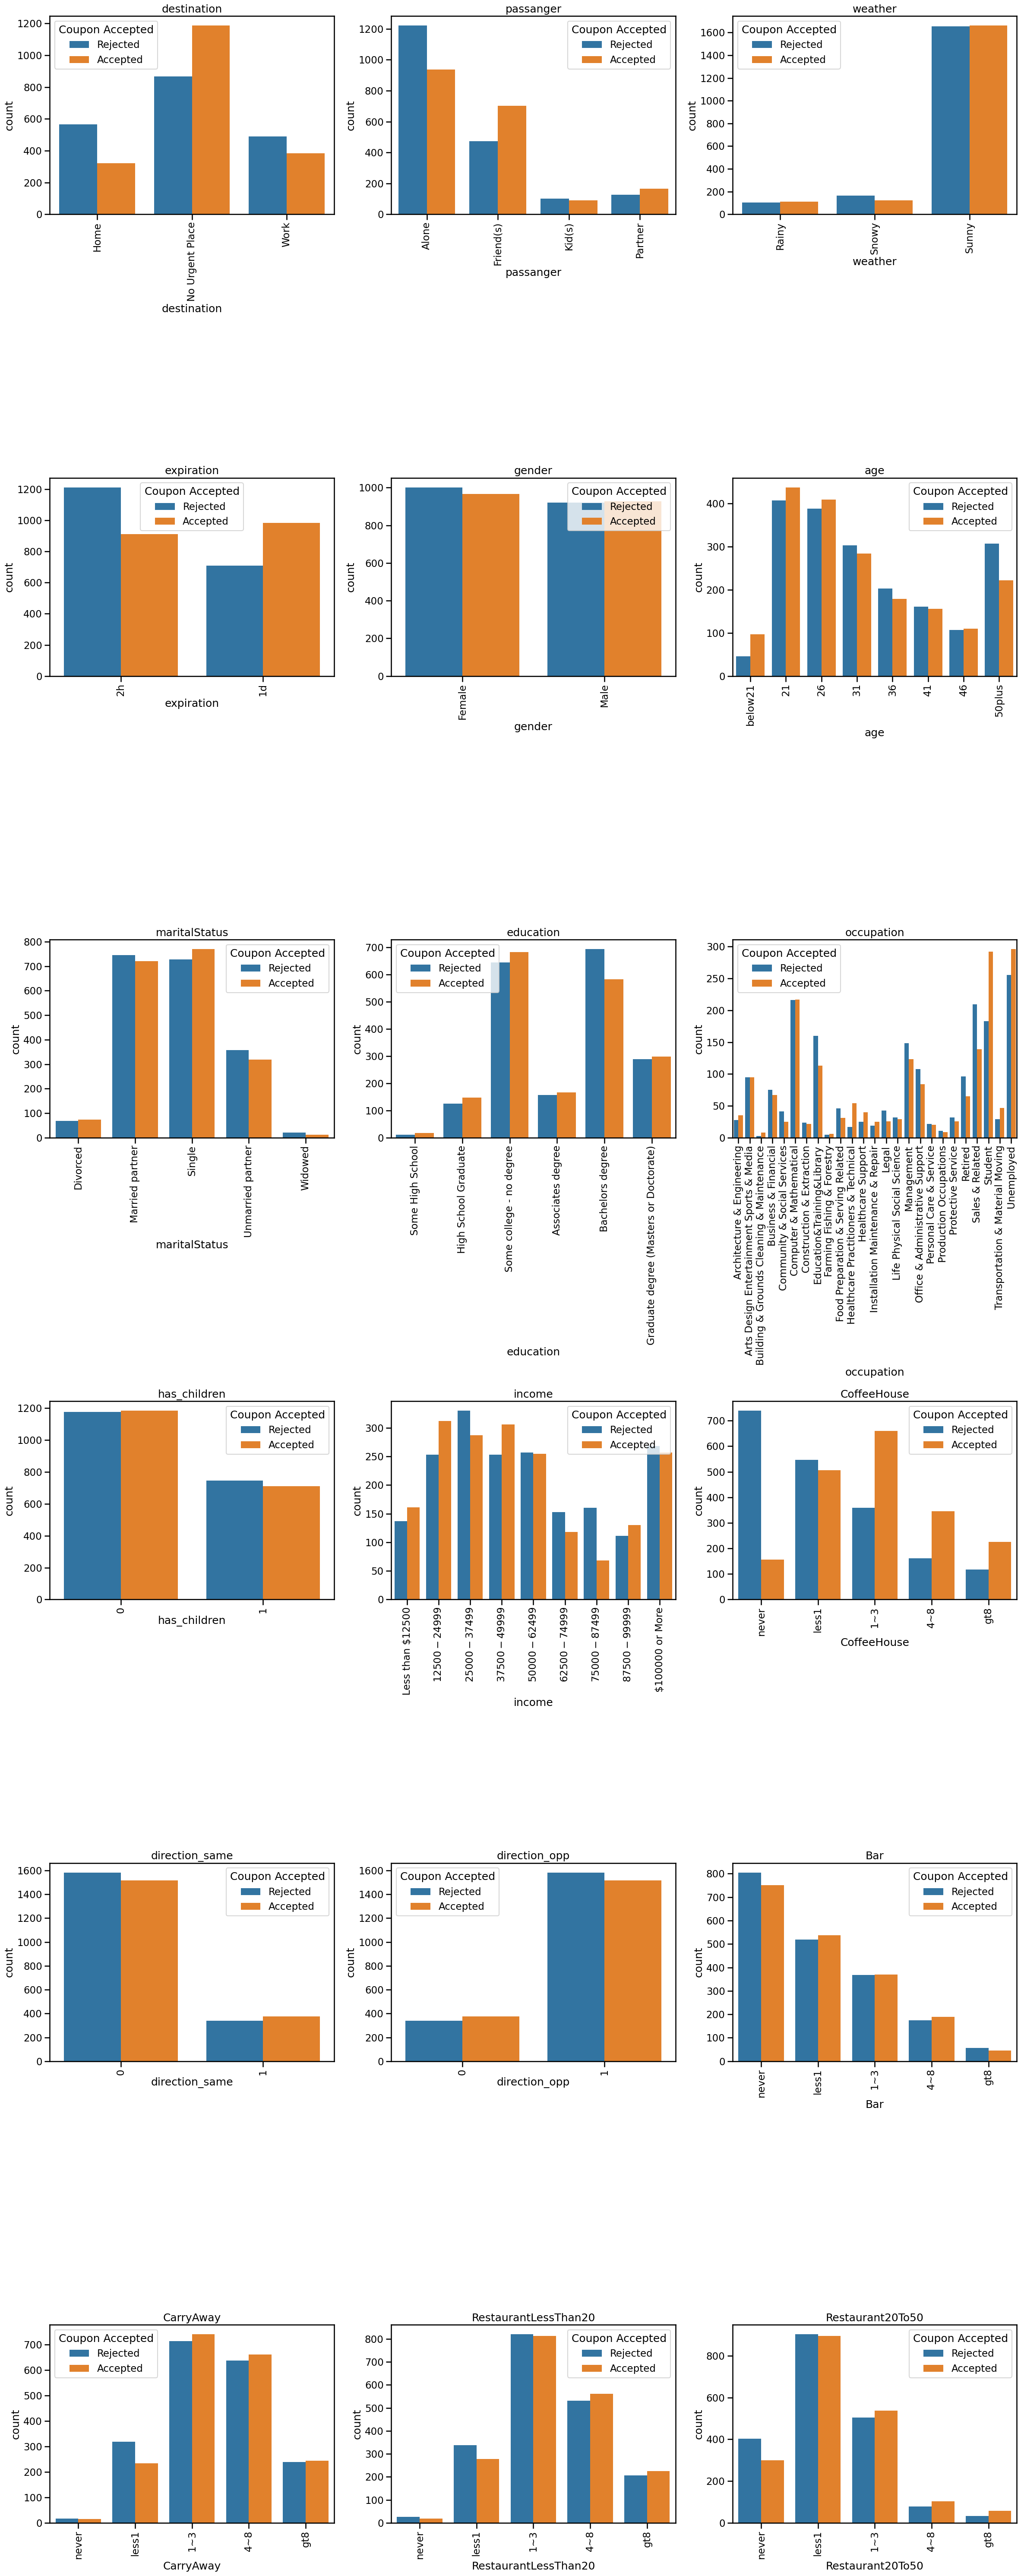

In [25]:
# List of variables to plot
variables = ['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'maritalStatus',
             'education', 'occupation', 'has_children', 'income', 'CoffeeHouse', 'direction_same', 'direction_opp', 'Bar', 'CarryAway',
             'RestaurantLessThan20', 'Restaurant20To50'
            ]

# Create a figure and a grid of subplots
num_vars = len(variables)
cols = 3  # Number of columns in the subplot grid
rows = num_vars // cols + (num_vars % cols > 0)  # Calculate the required number of rows

plt.figure(figsize=(24, 10 * rows))  

for i, var in enumerate(variables):
    plt.subplot(rows, cols, i + 1)  # Create a subplot for each variable
    ax = sns.countplot(data=coffee_house_df, x=var, hue='Y')
    ax.set_title(var)  # Set title to each subplot
    ax.legend(title='Coupon Accepted', labels=['Rejected', 'Accepted'])
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for readability

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.savefig('images/ch_1_initial_subplot_countplot.png', format='png')
plt.show()


From the above plots, its better to explore destination, passanger, expiration, age, maritalStatus, occupation and CoffeeHouse.

In [26]:
conditions = {
    'destination': ['No Urgent Place'],
    'passanger': ['Friend(s)', 'Partner'],
    'expiration': ['1d'],  # Assuming '1d' denotes 1 day
    'age': ['below21', '21', '26'],
    'occupation': ['Unemployed', 'Student'],
    'CoffeeHouse': ['1~3', '4~8', 'gt8']
}

# Filter the DataFrame for each condition and calculate acceptance rates
results = {}
for key, values in conditions.items():
    if key == 'education':
        filtered_df = coffee_house_df[coffee_house_df[key] != 'Bachelors degree']
    else:
        filtered_df = coffee_house_df[coffee_house_df[key].isin(values)]
    acceptance_rate = filtered_df['Y'].mean() * 100
    results[key] = acceptance_rate

# Display results
for category, rate in results.items():
    print(f"{category}: {rate:.2f}% acceptance rate")


destination: 57.82% acceptance rate
passanger: 59.14% acceptance rate
expiration: 58.06% acceptance rate
age: 52.86% acceptance rate
occupation: 57.31% acceptance rate
CoffeeHouse: 65.90% acceptance rate


Create a bar plot for the columns `destination`, `passanger`, `expiration`, `age`, `occupation` and `CoffeeHouse` with the percentage of accepted and rejected coupons.

In [27]:
def show_bar_plt_with_pct(data, x, color, color_map):
    '''
    Function that will take dataframe, column to plot (x), color and color map and creates a
    plotly bar plot.
    '''
    # Calculate the percentage of each 'Y' value within each 'destination'
    grouped = data.groupby([x, color]).size().reset_index(name='counts')
    group_sum = grouped.groupby(x)['counts'].transform('sum')
    grouped['percentage'] = (grouped['counts'] / group_sum) * 100

    # Replace 0 with 'Rejected' and 1 with 'Accepted'
    grouped[color] = grouped[color].replace(color_map)

    # Pivot the data to get 'Y' values as separate columns
    pivot_df = grouped.pivot(index=x, columns=color, values='percentage').reset_index()
    pivot_df.columns.name = None  # Remove the name of the column index

    # Melting the DataFrame to work with Plotly Express
    melted_df = pivot_df.melt(id_vars=x, value_vars=color_map.values(), var_name=color, value_name='percentage')

    # Create a bar plot using Plotly Express
    fig = px.bar(melted_df, x=x, y='percentage', color=color, text='percentage', barmode='group')

    # Update layout for better readability
    fig.update_layout(
        uniformtext_minsize=8, 
        uniformtext_mode='hide',
        barmode='group',
        xaxis_title=x,
        yaxis_title='Percentage'
    )

    # Update traces to show text on bars
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.write_image(file=f'images/ch_2_bar_plt_pct_{x}.png', format='png')
    # Show the plot
    fig.show()

# List of percent bar plots we want to create for each column.
analyze_columns = ['destination', 'passanger', 'expiration', 'age', 'CoffeeHouse']
for column in analyze_columns:
    show_bar_plt_with_pct(data=coffee_house_df, x=column, color='Y', color_map={0: 'Rejected', 1: 'Accepted'})


From the above plot for `CoffeeHouse` column people who accept coffee house coupon are by people who go coffee house atleast once a month.

In [28]:
# Replace coffee_house_df without people who go to coffee house atleast once a month.  
coffeeHouses = ['1~3', '4~8', 'gt8']
coffee_house_df = coffee_house_df.query(
    '(CoffeeHouse in @coffeeHouses)').reset_index(drop=True)
coffee_house_df.sample(5)

destination  passanger weather  temperature  time        coupon  \
1554  No Urgent Place    Partner   Snowy           30   2PM  Coffee House   
100              Home      Alone   Sunny           80   6PM  Coffee House   
373   No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
414              Work      Alone   Sunny           55   7AM  Coffee House   
1621  No Urgent Place  Friend(s)   Sunny           80  10PM  Coffee House   

     expiration  gender age      maritalStatus  has_children  \
1554         2h    Male  31    Married partner             0   
100          2h    Male  26             Single             0   
373          2h    Male  41    Married partner             1   
414          2h  Female  26             Single             0   
1621         1d  Female  31  Unmarried partner             1   

                                   education                  occupation  \
1554  Graduate degree (Masters or Doctorate)        Business & Financial   
100                 Some college - no degree                  Unemployed   
373   Graduate degree (Masters or Doctorate)  Education&Training&Library   
414                         Bachelors degree                  Unemployed   
1621                        Bachelors degree     Computer & Mathematical   

                income    Bar CoffeeHouse CarryAway RestaurantLessThan20  \
1554   $75000 - $87499    1~3         4~8     less1                  4~8   
100    $87500 - $99999  never         1~3       4~8                less1   
373    $50000 - $62499  less1         4~8       4~8                  1~3   
414   Less than $12500    4~8         1~3       gt8                  4~8   
1621   $62500 - $74999  never         1~3       4~8                  1~3   

     Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  \
1554            less1                 1                  1                  0   
100             never                 1                  0                  0   
373             less1                 1                  1                  0   
414               1~3                 1                  1                  0   
1621              1~3                 1                  1                  0   

      direction_same  direction_opp  Y  
1554               0              1  1  
100                0              1  0  
373                0              1  1  
414                0              1  0  
1621               0              1  0

In [29]:
# Define the age and passenger categories
ages = ['below21', '21', '26']
passangers = ['Friend(s)', 'Partner']
# Filter the DataFrame
ch_age_passenger = coffee_house_df.query(
    '(age in @ages) and (passanger in @passangers)'
)
acceptance_rates_combined = ch_age_passenger['Y'].mean() * 100
# Group by age and passenger, then calculate acceptance rate
ch_grouped = ch_age_passenger.groupby(['age', 'passanger'])
acceptance_rates = ch_grouped['Y'].mean() * 100  # Multiply by 100 to get percentages

# Print the acceptance rates for each combination
for (age, passanger), rate in acceptance_rates.items():
    if pd.notna(rate):
        print(f"Age: {age}, Passenger: {passanger}, Acceptance Rate: {rate:.2f}%")

print(f"Age: {ages}, Passenger: {passangers}, Acceptance Rate: {acceptance_rates_combined:.2f}%")


Age: below21, Passenger: Friend(s), Acceptance Rate: 87.50%
Age: below21, Passenger: Partner, Acceptance Rate: 75.00%
Age: 21, Passenger: Friend(s), Acceptance Rate: 81.10%
Age: 21, Passenger: Partner, Acceptance Rate: 74.07%
Age: 26, Passenger: Friend(s), Acceptance Rate: 75.33%
Age: 26, Passenger: Partner, Acceptance Rate: 80.00%
Age: ['below21', '21', '26'], Passenger: ['Friend(s)', 'Partner'], Acceptance Rate: 78.57%


In [30]:
# Define the age and occupations categories
ages = ['below21', '21', '26']
occupations = ['Unemployed', 'Student']

# Filter the DataFrame
ch_age_occupation = coffee_house_df.query('(age in @ages) and (occupation in @occupations)')
acceptance_rates_combined = ch_age_occupation['Y'].mean() * 100
# Group by age and occupations, then calculate acceptance rate
ch_grouped = ch_age_occupation.groupby(['age', 'occupation'])
acceptance_rates = ch_grouped['Y'].mean() * 100  # Multiply by 100 to get percentages

# Print the acceptance rates for each combination
for (age, occupation), rate in acceptance_rates.items():
    if pd.notna(rate):
        print(f"Age: {age}, Occupation: {occupation}, Acceptance Rate: {rate:.2f}%")

print(f"Age: {ages}, Occupation: {occupations}, Acceptance Rate: {acceptance_rates_combined:.2f}%")

Age: below21, Occupation: Student, Acceptance Rate: 78.35%
Age: 21, Occupation: Student, Acceptance Rate: 67.76%
Age: 21, Occupation: Unemployed, Acceptance Rate: 78.95%
Age: 26, Occupation: Student, Acceptance Rate: 46.15%
Age: 26, Occupation: Unemployed, Acceptance Rate: 70.51%
Age: ['below21', '21', '26'], Occupation: ['Unemployed', 'Student'], Acceptance Rate: 72.41%


In [31]:
# Define the age and occupations categories
ages = ['below21', '21', '26']
expirations = ['1d']

# Filter the DataFrame
ch_age_expiration = coffee_house_df.query('(age in @ages) and (expiration in @expirations)')
acceptance_rates_combined = ch_age_expiration['Y'].mean() * 100
# Group by age and expirations, then calculate acceptance rate
ch_grouped = ch_age_expiration.groupby(['age', 'expiration'])
acceptance_rates = ch_grouped['Y'].mean() * 100  # Multiply by 100 to get percentages

# Print the acceptance rates for each combination
for (age, expiration), rate in acceptance_rates.items():
    if pd.notna(rate):
        print(f"Age: {age}, Expiration: {expiration}, Acceptance Rate: {rate:.2f}%")

print(f"Age: {ages}, Expiration: {expirations}, Acceptance Rate: {acceptance_rates_combined:.2f}%")

Age: below21, Expiration: 1d, Acceptance Rate: 88.46%
Age: 21, Expiration: 1d, Acceptance Rate: 82.29%
Age: 26, Expiration: 1d, Acceptance Rate: 80.47%
Age: ['below21', '21', '26'], Expiration: ['1d'], Acceptance Rate: 82.32%


In [32]:
# Filter the DataFrame
ages = ['below21']
expirations = ['1d']
occupations = ['Student']

ch_age_expiration_occupation = coffee_house_df.query(
    '(age in @ages) and (expiration in @expirations) and (occupation in @occupations)'
)


print(f"Age: {ages}, Expiration: {expirations}, Occupation: {occupations}, Acceptance Rate: {ch_age_expiration_occupation['Y'].mean() * 100:.2f}%")


Age: ['below21'], Expiration: ['1d'], Occupation: ['Student'], Acceptance Rate: 93.18%
